In [14]:
import numpy as np

dt = 0.005
t = np.arange(0, 30 + dt, dt)
a = len(t)

dd = (np.pi / 180) * 3
x1 = np.full(a, dd)
x2 = np.zeros(a)
x3 = np.full(a, dd)
x4 = np.zeros(a)
x5 = np.full(a, dd)
x6 = np.zeros(a)
x7 = np.full(a, 0.6)
x8 = np.zeros(a)
x9 = np.full(a, 0.6)
x10 = np.zeros(a)
x11 = np.zeros(a)
x12 = np.zeros(a)
xi1=(np.pi/180)*dd
xi3=xi1
xi5=xi1
xi7=0.6
xi9=0.6
xi11=0

u1=np.zeros(a)
u2=np.zeros(a)
u3=np.zeros(a)
u4=np.zeros(a)
ux=np.zeros(a)
uy=np.zeros(a)

g=9.81;
m=1.17;
l=0.45/2;
jr=8.5*(10^(-4));
Ixx=0.0119;
Iyy=Ixx;
Izz=0.0223;
b=7.73*(10^(-6));
d=1.27*(10^(-7));
a1=(Iyy-Izz)/Ixx;
a2=jr/Ixx;
a3=(Izz-Ixx)/Iyy;
a4=-jr/Iyy;
a5=(Ixx-Iyy)/Izz;
b1=l/Ixx;
b2=l/Iyy;
b3=l/Izz;

Sphi=np.zeros(a)
Steta=np.zeros(a)
Ssai=np.zeros(a)
Sz=np.zeros(a)
Sx=np.zeros(a)
Sy=np.zeros(a)
omega=np.zeros(a)
landa=np.array([4.5,4.5,6,7,9,9])
k=12;
xx=5;
yy=5;
zz=5;

x1d=0;
dx1d=0

In [15]:
b4 = 1 / (b); bl = 1 / ( 2 * l * b); d4 = 1 / (d);

for i in range(a-1):
    omega1=np.sqrt(np.abs((u1[i]*b4)-( u3[i]*bl)-( u2[i]*bl)+( u4[i]*d4)))
    omega2=np.sqrt(np.abs((u1[i]*b4)-( u3[i]*bl)+( u2[i]*bl)-( u4[i]*d4)))
    omega3=np.sqrt(np.abs((u1[i]*b4)+( u3[i]*bl)-( u2[i]*bl)-( u4[i]*d4)))
    omega4=np.sqrt(np.abs((u1[i]*b4)+( u2[i]*bl)+( u3[i]*bl)+( u4[i]*d4)))
    omega[i+1]=-omega1+omega2-omega3+ omega4

    Sphi[i+1]=dx1d-x2[i] + landa[0]*(x1d-x1[i])
    Steta[i+1]=dx1d-x4[i]+landa[1]*(x1d-x3[i])
    Ssai[i+1]=dx1d-x6[i]+landa[2]*(x1d-x5[i])
    Sz[i+1]=dx1d-x12[i]+landa[3]*(zz-x11[i])
    Sx[i+1]=-x8[i]+landa[4]*(xx-x7[i])
    Sy[i+1]=-x10[i]+landa[5]*(yy-x9[i])


    u1[i+1]=(m/(np.cos(x1[i])*np.cos(x3[i])))*(k*np.tanh(Sz[i+1])+g+landa[3]*(dx1d-x12[i]))
    u2[i+1]=(1/b1)*(k*np.tanh(Sphi[i+1])-a1*x4[i]*x6[i]-x4[i]*a2*omega[i+1]+landa[0]*(dx1d-x2[i]))
    u3[i+1]=(1/b2)*(k*np.tanh(Steta[i+1])-a3*x2[i]*x6[i]-x2[i]*a4*omega[i+1]+landa[1]*(dx1d-x4[i]))
    u4[i+1]=(1/b3)*(k*np.tanh(Ssai[i+1])-a5*x4[i]*x2[i] +landa[2]*(dx1d-x6[i]))
    ux[i+1]=(m/u1[i+1])*(k*np.tanh(Sx[i+1]) +landa[4]*(0-x8[i]))
    uy[i+1]=(m/u1[i+1])*(k*np.tanh(Sy[i+1]) +landa[5]*(0-x10[i]))

    x1[i+1]=x1[i] + dt*(x2[i])
    x2[i+1]=x2[i] + dt*(x4[i]*x6[i]*a1+x4[i]*a2*omega[i+1]+b1*u2[i+1])
    x3[i+1]=x3[i] + dt*(x4[i])
    x4[i+1]=x4[i] + dt*(x2[i]*x6[i]*a3+x2[i]*a4*omega[i+1]+b2*u3[i+1])
    x5[i+1]=x5[i] + dt*(x6[i])
    x6[i+1]=x6[i] + dt*(x4[i]*x2[i]*a5+b3*u4[i+1])
    x7[i+1]=x7[i] + dt*(x8[i])
    x8[i+1]=x8[i] + dt*((ux[i+1])*(u1[i+1]/m));
    x9[i+1]=x9[i] + dt*(x10[i])
    x10[i+1]=x10[i] + dt*(uy[i+1]*(u1[i+1]/m));
    x11[i+1]=x11[i] + dt*(x12[i])
    x12[i+1]=x12[i] + dt*(-g +(((np.cos(x1[i])*np.cos(x3[i])*u1[i+1])/m)))

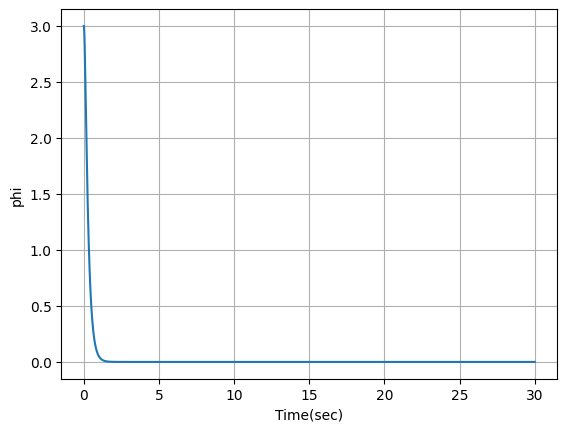

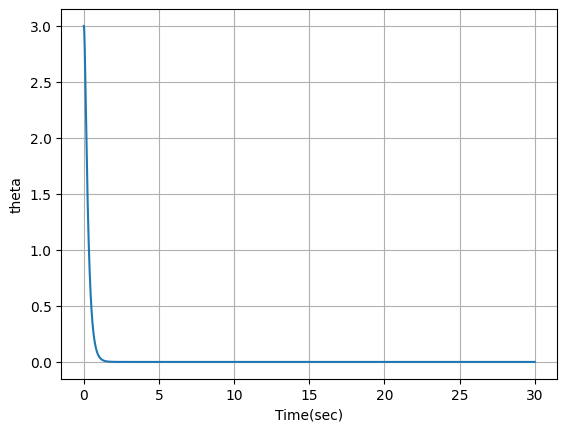

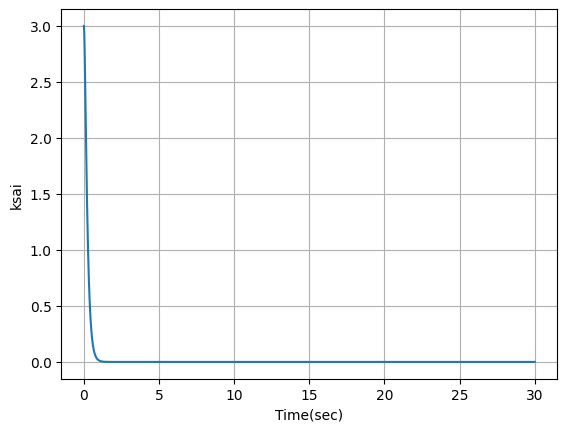

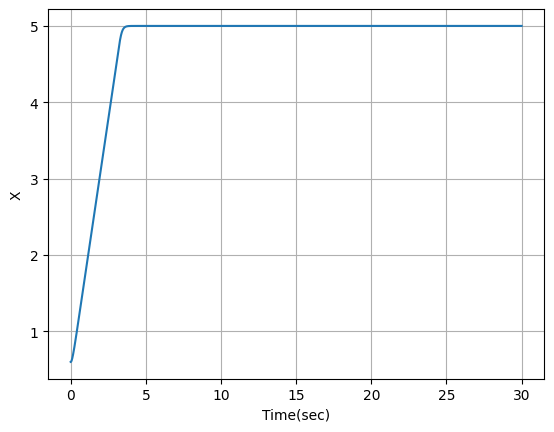

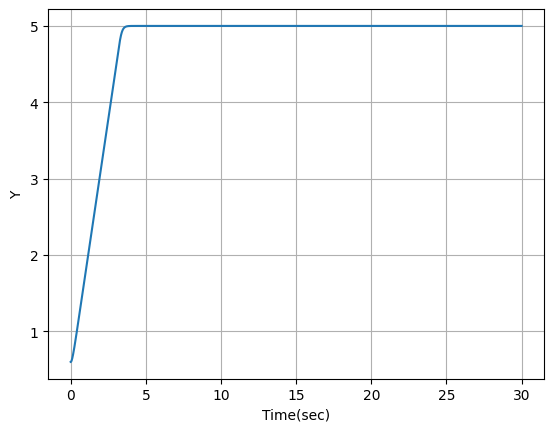

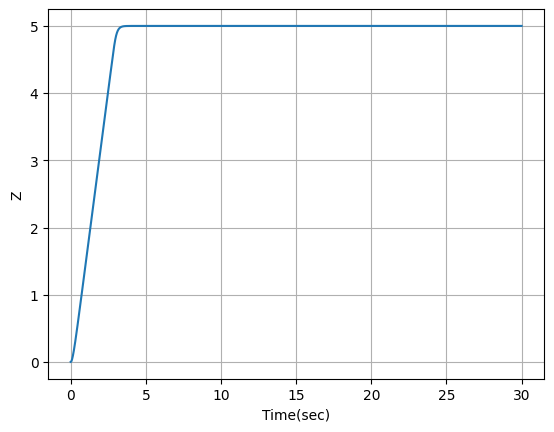

In [19]:
import matplotlib.pyplot as plt
# Rad2Deg=np.pi/180
plt.figure(1)
plt.plot(t, np.rad2deg(x1), linewidth=1.5)
plt.xlabel('Time(sec)')
plt.ylabel('phi')
plt.grid(True)


plt.figure(2)
plt.plot(t, np.rad2deg(x3), linewidth=1.5)
plt.xlabel('Time(sec)')
plt.ylabel('theta')
plt.grid(True)

plt.figure(3)
plt.plot(t, np.rad2deg(x5), linewidth=1.5)
plt.xlabel('Time(sec)')
plt.ylabel('ksai')
plt.grid(True)

plt.figure(4)
plt.plot(t, x7, linewidth=1.5)
plt.xlabel('Time(sec)')
plt.ylabel('X')
plt.grid(True)


plt.figure(5)
plt.plot(t, x9, linewidth=1.5)
plt.xlabel('Time(sec)')
plt.ylabel('Y')
plt.grid(True)

plt.figure(6)
plt.plot(t, x11, linewidth=1.5)
plt.xlabel('Time(sec)')
plt.ylabel('Z')
plt.grid(True)